In [2]:
%matplotlib inline
import numpy as np
import netCDF4 as nc
import pylab as py

py.rc('text', usetex=True)
py.rc('font', family='serif', serif='Palatino',weight='bold')

In [3]:
land="/project2/tas1/pragallva/Fall_quarter_2017/land_files/Ruth_full1.nc"
data=nc.Dataset(land,'r')
mask=data.variables['land_mask'][:]

lat=data.variables['lat'][:]
lon=data.variables['lon'][:]

In [15]:

a=6371e3
import scipy.integrate as integrate
def integrated(lat,x):
    l=np.deg2rad(lat)
    x=x*np.cos(l)
    int_x  =integrate.cumtrapz(x[::-1],l[::-1],axis=0,initial=None) #  (This is basically integration from - 90 deg)
    int_x_r=integrate.cumtrapz(x      ,l      ,axis=0,initial=None) #  (This is basically integration from + 90 deg) 
    avg_int_r=2*np.pi*a**2*(int_x[::-1][1:]+int_x_r[:-1])/2.0
    return avg_int_r/10**15

def P(N=1):
    if N==1 :
        p0=-50.1685 - 3.6217329208345177; p1=4.9755; p2=-1.4162*0.1; p3=1.6743*0.001; p4=-6.8650*10**-6
    else :
        p0=-56.0193 - 0; p1=-6.4824; p2=-2.3494*0.1; p3=-3.4685*0.001; p4=-1.7732*10**-5
    return p0,p1,p2,p3,p4

N=P(1); S=P(-1)
l=(lat)
lS=l[:len(l)/2]
lN=l[len(l)/2:]

qN=np.zeros((len(l)/2)); qS=np.zeros((len(l)/2))
for i in range(5):
    qN=qN+N[i]*lN**i; qS=qS+S[i]*lS**i
    
q=np.append(qS,qN)
qflux=integrated(lat,q)


nlon=len(lon)        
zonal_flux = np.squeeze(np.dstack([q]*nlon))
zonal_flux[mask==1]=0

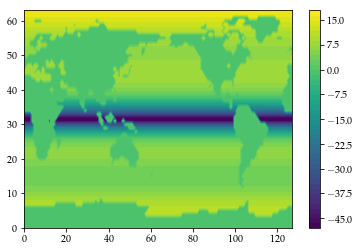

In [16]:
import numpy.ma as ma
totalq=ma.array(zonal_flux, mask=mask)
# zonal_flux[mask==1]=0
py.contourf(zonal_flux,50);py.colorbar()

In [17]:
py.save('/project/tas1/pragallva/Fall_quarter_2017/Isca/input/tracmip_qflux.npy',zonal_flux)

1.8108656112642052


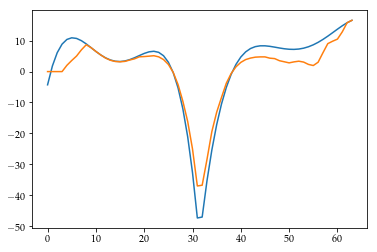

In [18]:
py.plot(q)
py.plot(zonal_flux.mean(axis=1))
print q.mean()

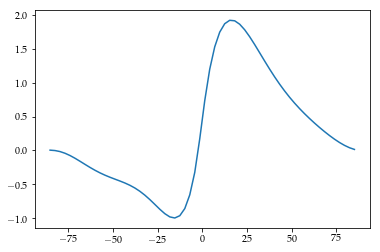

In [8]:
py.plot(lat[1:-1],-integrated(lat,q))

In [16]:
py.save('/project/tas1/pragallva/Fall_quarter_2017/Isca/input/zonal_tracmip_qflux.npy',q)

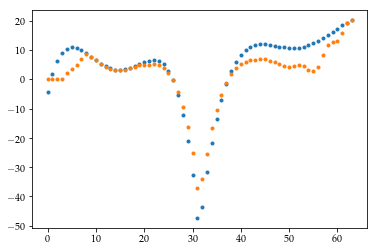

In [10]:
py.plot(q,'.')
py.plot(zonal_flux.mean(axis=1),'.')